In [1]:
!pip install nltk==3.3

You should consider upgrading via the '/anaconda/envs/azureml_py36/bin/python -m pip install --upgrade pip' command.


In [3]:
!pip install plotly

You should consider upgrading via the '/anaconda/envs/azureml_py36/bin/python -m pip install --upgrade pip' command.


In [2]:
!pip install wordcloud

You should consider upgrading via the '/anaconda/envs/azureml_py36/bin/python -m pip install --upgrade pip' command.


In [3]:
!pip install contractions

You should consider upgrading via the '/anaconda/envs/azureml_py36/bin/python -m pip install --upgrade pip' command.


In [4]:
import pandas as pd
import numpy as np

import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize, TweetTokenizer
from nltk import FreqDist, classify, NaiveBayesClassifier
import re, string, random

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import contractions

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/azureuser/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/azureuser/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/azureuser/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/azureuser/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Load Data

In [39]:
df = pd.read_csv('airline_sentiment_analysis.csv').drop("Unnamed: 0", axis=1)
df.head()

,airline_sentiment,text
0,positive,@VirginAmerica plus you've added commercials t...
1,negative,@VirginAmerica it's really aggressive to blast...
2,negative,@VirginAmerica and it's a really big bad thing...
3,negative,@VirginAmerica seriously would pay $30 a fligh...
4,positive,"@VirginAmerica yes, nearly every time I fly VX..."


# EDA

In [7]:
fig = px.histogram(df, x="airline_sentiment")
fig.update_traces(marker_color="indianred",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Sentiment')
fig.show()

In [8]:
# Create stopword list:
swords = set(STOPWORDS) # set(stopwords.words('english'))
swords.update(["br", "href"])

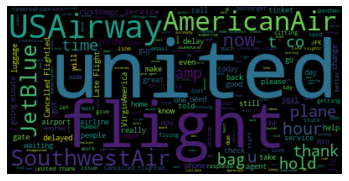

In [9]:
# create a wordcloud of the words in the reviews
text = " ".join(review for review in df.text)
wordcloud = WordCloud(stopwords=swords).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [10]:
positive = df[df['airline_sentiment'] == 'positive']
negative = df[df['airline_sentiment'] == 'negative']

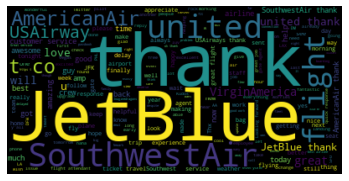

In [11]:
# word cloud of words in positive reviews
pos = " ".join(review for review in positive.text)
wordcloud2 = WordCloud(stopwords=swords).generate(pos)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

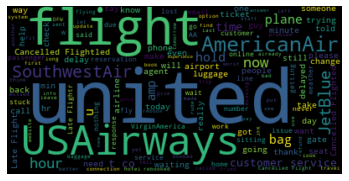

In [12]:
# word cloud of words in negative reviews
neg = " ".join(review for review in negative.text)
wordcloud3 = WordCloud(stopwords=swords).generate(neg)
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis("off")
plt.show()

# Clean data

In [40]:
def remove_punctuation(text):
    final = "".join(letter for letter in text if letter not in ("?", ".", ";", ":",  "!",'"'))
    return final

df['text'] = df['text'].apply(remove_punctuation)
df.head()

,airline_sentiment,text
0,positive,@VirginAmerica plus you've added commercials t...
1,negative,@VirginAmerica it's really aggressive to blast...
2,negative,@VirginAmerica and it's a really big bad thing...
3,negative,@VirginAmerica seriously would pay $30 a fligh...
4,positive,"@VirginAmerica yes, nearly every time I fly VX..."


In [41]:
def expand_contractions(text):
    final = "".join(contractions.fix(word)+" " for word in text.split(" "))
    return final

df['text'] = df['text'].apply(expand_contractions)
df.head()

,airline_sentiment,text
0,positive,@VirginAmerica plus you have added commercials...
1,negative,@VirginAmerica it is really aggressive to blas...
2,negative,@VirginAmerica and it is a really big bad thin...
3,negative,@VirginAmerica seriously would pay $30 a fligh...
4,positive,"@VirginAmerica yes, nearly every time I fly VX..."


In [42]:
positive = df[df['airline_sentiment'] == 'positive']
negative = df[df['airline_sentiment'] == 'negative']

# Test and Train Split
80% training data. 20% test. Could do k-fold cross validation in the future

In [43]:
train, test = train_test_split(df, test_size=0.2)
train = pd.DataFrame(train)
test = pd.DataFrame(test)
train.head()

,airline_sentiment,text
10478,negative,@AmericanAir I have witnessed a manager named ...
10484,negative,"@AmericanAir Thanks that was done, I just do n..."
8296,negative,@USAirways this is ridiculous #planebroken can...
4075,negative,@SouthwestAir wifi on my plane but I got to pa...
6404,negative,@JetBlue I had 2 fight 2 get a credit for the ...


# Simple Logistic Regression Model
Useful as a baseline

In [44]:
# count vectorizer (bag of words):
vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')
train_matrix = vectorizer.fit_transform(train['text'])
test_matrix = vectorizer.transform(test['text'])

In [45]:
X_train = train_matrix
X_test = test_matrix
y_train = train['airline_sentiment']
y_test = test['airline_sentiment']

In [46]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Test Logistic Model

In [47]:
predictions = lr.predict(X_test)

In [48]:
# find accuracy, precision, recall:
new = np.asarray(y_test)
confusion_matrix(predictions,y_test)

array([[1758,  117],
       [  73,  361]])

In [49]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

    negative       0.96      0.94      0.95      1875
    positive       0.76      0.83      0.79       434

    accuracy                           0.92      2309
   macro avg       0.86      0.88      0.87      2309
weighted avg       0.92      0.92      0.92      2309



In [50]:
custom_tweet = "@Icelandair, my flight was absolutely terrible. It was delayed by 6 hours! I want a refun :("
custom_tweet = remove_punctuation(custom_tweet)
custom_tweet = expand_contractions(custom_tweet)
custom_vector = vectorizer.transform([custom_tweet])
lr.predict(custom_vector)[0]

'negative'

In [64]:
import pickle
f = open('logisticClassifier.pickle','wb')
pickle.dump(lr, f)
f.close()

In [ ]:
# import pickle
# f = open('logisticClassifier.pickle','rb')
# classifier = pickle.load(f)
# f.close()

# NaiveBayes Classifier with Tokenization
Probabilistic approach using Bayes's theorem. Handy because it shows feature importance so it can be confirmed that the model makes sense

In [51]:
# tokenize using default tokenizer, there are twitter specific ones as well
# df['tokenized_text'] = df['text'].apply(TweetTokenizer().tokenize)
df['tokenized_text'] = df['text'].apply(word_tokenize)
df.head()

,airline_sentiment,text,tokenized_text
0,positive,@VirginAmerica plus you have added commercials...,"[@, VirginAmerica, plus, you, have, added, com..."
1,negative,@VirginAmerica it is really aggressive to blas...,"[@, VirginAmerica, it, is, really, aggressive,..."
2,negative,@VirginAmerica and it is a really big bad thin...,"[@, VirginAmerica, and, it, is, a, really, big..."
3,negative,@VirginAmerica seriously would pay $30 a fligh...,"[@, VirginAmerica, seriously, would, pay, $, 3..."
4,positive,"@VirginAmerica yes, nearly every time I fly VX...","[@, VirginAmerica, yes, ,, nearly, every, time..."


In [52]:
# determine context of each token
df['tagged_text'] = df['tokenized_text'].apply(pos_tag)
df.head()

,airline_sentiment,text,tokenized_text,tagged_text
0,positive,@VirginAmerica plus you have added commercials...,"[@, VirginAmerica, plus, you, have, added, com...","[(@, NN), (VirginAmerica, NNP), (plus, CC), (y..."
1,negative,@VirginAmerica it is really aggressive to blas...,"[@, VirginAmerica, it, is, really, aggressive,...","[(@, NN), (VirginAmerica, NNP), (it, PRP), (is..."
2,negative,@VirginAmerica and it is a really big bad thin...,"[@, VirginAmerica, and, it, is, a, really, big...","[(@, NN), (VirginAmerica, NNP), (and, CC), (it..."
3,negative,@VirginAmerica seriously would pay $30 a fligh...,"[@, VirginAmerica, seriously, would, pay, $, 3...","[(@, NN), (VirginAmerica, NNP), (seriously, RB..."
4,positive,"@VirginAmerica yes, nearly every time I fly VX...","[@, VirginAmerica, yes, ,, nearly, every, time...","[(@, NN), (VirginAmerica, NNP), (yes, UH), (,,..."


In [53]:
def lemmatize_sentence(tagged):
    lemmatizer = WordNetLemmatizer()
    lemmatized_sentence = []
    for word, tag in tagged:
        if tag.startswith('NN'):
            pos = 'n'
        elif tag.startswith('VB'):
            pos = 'v'
        else:
            pos = 'a'
        lemmatized_sentence.append(lemmatizer.lemmatize(word, pos))
    return lemmatized_sentence

df['lemmatized_text'] = df['tagged_text'].apply(lemmatize_sentence)
df.head()

,airline_sentiment,text,tokenized_text,tagged_text,lemmatized_text
0,positive,@VirginAmerica plus you have added commercials...,"[@, VirginAmerica, plus, you, have, added, com...","[(@, NN), (VirginAmerica, NNP), (plus, CC), (y...","[@, VirginAmerica, plus, you, have, add, comme..."
1,negative,@VirginAmerica it is really aggressive to blas...,"[@, VirginAmerica, it, is, really, aggressive,...","[(@, NN), (VirginAmerica, NNP), (it, PRP), (is...","[@, VirginAmerica, it, be, really, aggressive,..."
2,negative,@VirginAmerica and it is a really big bad thin...,"[@, VirginAmerica, and, it, is, a, really, big...","[(@, NN), (VirginAmerica, NNP), (and, CC), (it...","[@, VirginAmerica, and, it, be, a, really, big..."
3,negative,@VirginAmerica seriously would pay $30 a fligh...,"[@, VirginAmerica, seriously, would, pay, $, 3...","[(@, NN), (VirginAmerica, NNP), (seriously, RB...","[@, VirginAmerica, seriously, would, pay, $, 3..."
4,positive,"@VirginAmerica yes, nearly every time I fly VX...","[@, VirginAmerica, yes, ,, nearly, every, time...","[(@, NN), (VirginAmerica, NNP), (yes, UH), (,,...","[@, VirginAmerica, yes, ,, nearly, every, time..."


In [54]:
# remove links, twitter handles and punctuation (just in case) since they are difficult to process otherwise
def remove_noise(tweet_tokens, stop_words = ()):

    cleaned_tokens = []

    for token, tag in pos_tag(tweet_tokens):
        token = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+#]|[!*\(\),]|'\
                       '(?:%[0-9a-fA-F][0-9a-fA-F]))+','', token)
        token = re.sub("(@[A-Za-z0-9_]+)","", token)

        if tag.startswith("NN"):
            pos = 'n'
        elif tag.startswith('VB'):
            pos = 'v'
        else:
            pos = 'a'

        lemmatizer = WordNetLemmatizer()
        token = lemmatizer.lemmatize(token, pos)

        if len(token) > 0 and token not in string.punctuation and token.lower() not in stop_words:
            cleaned_tokens.append(token.lower())
    return cleaned_tokens

df['cleaned_text'] = df['tokenized_text'].apply(lambda text: remove_noise(text, stopwords.words('english')))
df.head()

,airline_sentiment,text,tokenized_text,tagged_text,lemmatized_text,cleaned_text
0,positive,@VirginAmerica plus you have added commercials...,"[@, VirginAmerica, plus, you, have, added, com...","[(@, NN), (VirginAmerica, NNP), (plus, CC), (y...","[@, VirginAmerica, plus, you, have, add, comme...","[virginamerica, plus, add, commercial, experie..."
1,negative,@VirginAmerica it is really aggressive to blas...,"[@, VirginAmerica, it, is, really, aggressive,...","[(@, NN), (VirginAmerica, NNP), (it, PRP), (is...","[@, VirginAmerica, it, be, really, aggressive,...","[virginamerica, really, aggressive, blast, obn..."
2,negative,@VirginAmerica and it is a really big bad thin...,"[@, VirginAmerica, and, it, is, a, really, big...","[(@, NN), (VirginAmerica, NNP), (and, CC), (it...","[@, VirginAmerica, and, it, be, a, really, big...","[virginamerica, really, big, bad, thing]"
3,negative,@VirginAmerica seriously would pay $30 a fligh...,"[@, VirginAmerica, seriously, would, pay, $, 3...","[(@, NN), (VirginAmerica, NNP), (seriously, RB...","[@, VirginAmerica, seriously, would, pay, $, 3...","[virginamerica, seriously, would, pay, 30, fli..."
4,positive,"@VirginAmerica yes, nearly every time I fly VX...","[@, VirginAmerica, yes, ,, nearly, every, time...","[(@, NN), (VirginAmerica, NNP), (yes, UH), (,,...","[@, VirginAmerica, yes, ,, nearly, every, time...","[virginamerica, yes, nearly, every, time, fly,..."


In [55]:
def prepare_data(dataframe):
    dataframe['tokenized_text'] = dataframe['text'].apply(word_tokenize)
    dataframe['cleaned_text'] = dataframe['tokenized_text'].apply(lambda text: remove_noise(text, stopwords.words('english')))
    dataframe.head()

In [68]:
prepare_data(df)
positive = df[df['airline_sentiment'] == 'positive']
negative = df[df['airline_sentiment'] == 'negative']

In [69]:
def get_tweets_for_model(cleaned_tokens_list):
    for tweet_tokens in cleaned_tokens_list:
        yield dict([token, True] for token in tweet_tokens)

positive_tokens_for_model = get_tweets_for_model(list(positive['cleaned_text']))
negative_tokens_for_model = get_tweets_for_model(list(negative['cleaned_text']))

In [70]:
positive_dataset = [(tweet_dict, "Positive") for tweet_dict in positive_tokens_for_model]

negative_dataset = [(tweet_dict, "Negative") for tweet_dict in negative_tokens_for_model]

dataset = positive_dataset + negative_dataset

random.shuffle(dataset)

train_data = dataset[:int(len(dataset)*0.8)]
test_data = dataset[int(len(dataset)*0.8):]

In [71]:
dict([token, True] for token in list(positive['cleaned_text'])[0])

{'virginamerica': True,
 'plus': True,
 'add': True,
 'commercial': True,
 'experience': True,
 'tacky': True}

In [72]:
classifier = NaiveBayesClassifier.train(train_data)

print("Accuracy is:", classify.accuracy(classifier, test_data))

print(classifier.show_most_informative_features(10))

Accuracy is: 0.9116500649631876
Most Informative Features
               wonderful = True           Positi : Negati =     52.3 : 1.0
               fantastic = True           Positi : Negati =     39.5 : 1.0
                passbook = True           Positi : Negati =     34.4 : 1.0
                   kudos = True           Positi : Negati =     32.9 : 1.0
             outstanding = True           Positi : Negati =     29.3 : 1.0
                     lt3 = True           Positi : Negati =     29.3 : 1.0
                favorite = True           Positi : Negati =     26.8 : 1.0
                       😊 = True           Positi : Negati =     26.8 : 1.0
                    mint = True           Positi : Negati =     24.2 : 1.0
                 amazing = True           Positi : Negati =     22.1 : 1.0
None


likelihood ratios (e.g. 29.3 : 1.0) indicate how many times more likely a token is to be in a positive/negative text

In [73]:
print(classification_report([classifier.classify(data) for data, label in test_data],[label for data, label in test_data]))

              precision    recall  f1-score   support

    Negative       0.98      0.92      0.95      1983
    Positive       0.64      0.88      0.74       326

    accuracy                           0.91      2309
   macro avg       0.81      0.90      0.84      2309
weighted avg       0.93      0.91      0.92      2309



In [74]:
custom_tweet = "@Icelandair, my flight was absolutely terrible. It was delayed by 6 hours! I want a refun :("
custom_tweet = remove_punctuation(custom_tweet)
custom_tweet = expand_contractions(custom_tweet)
custom_tokens = remove_noise(word_tokenize(custom_tweet))

print(classifier.classify(dict([token, True] for token in custom_tokens)))

Negative


In [75]:
import pickle
f = open('NaiveBayesClassifier.pickle','wb')
pickle.dump(classifier, f)
f.close()